In [ ]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("qucwang/hotel-bookings-analysis-dataset")

print("Path to dataset files:", path)


100%|██████████| 1.25M/1.25M [00:00<00:00, 49.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/qucwang/hotel-bookings-analysis-dataset/versions/1


In [ ]:
# Menampilkan isi folder dataset untuk memastikan nama file yang benar
dataset_folder = '/root/.cache/kagglehub/datasets/qucwang/hotel-bookings-analysis-dataset/versions/1'
for filename in os.listdir(dataset_folder):
    print(filename)


hotel_bookings.csv


In [ ]:
file_path = os.path.join(dataset_folder,'hotel_bookings.csv')

In [ ]:
# Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [ ]:
df = df.dropna(subset=['agent', 'company'])

In [ ]:
x = df[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number']]
y = df['is_canceled']


In [ ]:
x

,lead_time,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number
2392,6,2015,11,42
2697,24,2015,26,44
2867,24,2015,3,45
2877,24,2015,3,45
2878,24,2015,3,45
...,...,...,...,...
112499,13,2017,24,21
113046,13,2017,29,22
113082,13,2017,29,22
113627,210,2017,9,23


In [ ]:
y

,is_canceled
2392,0
2697,0
2867,0
2877,0
2878,0
...,...
112499,0
113046,0
113082,0
113627,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")


Akurasi model: 95.45%


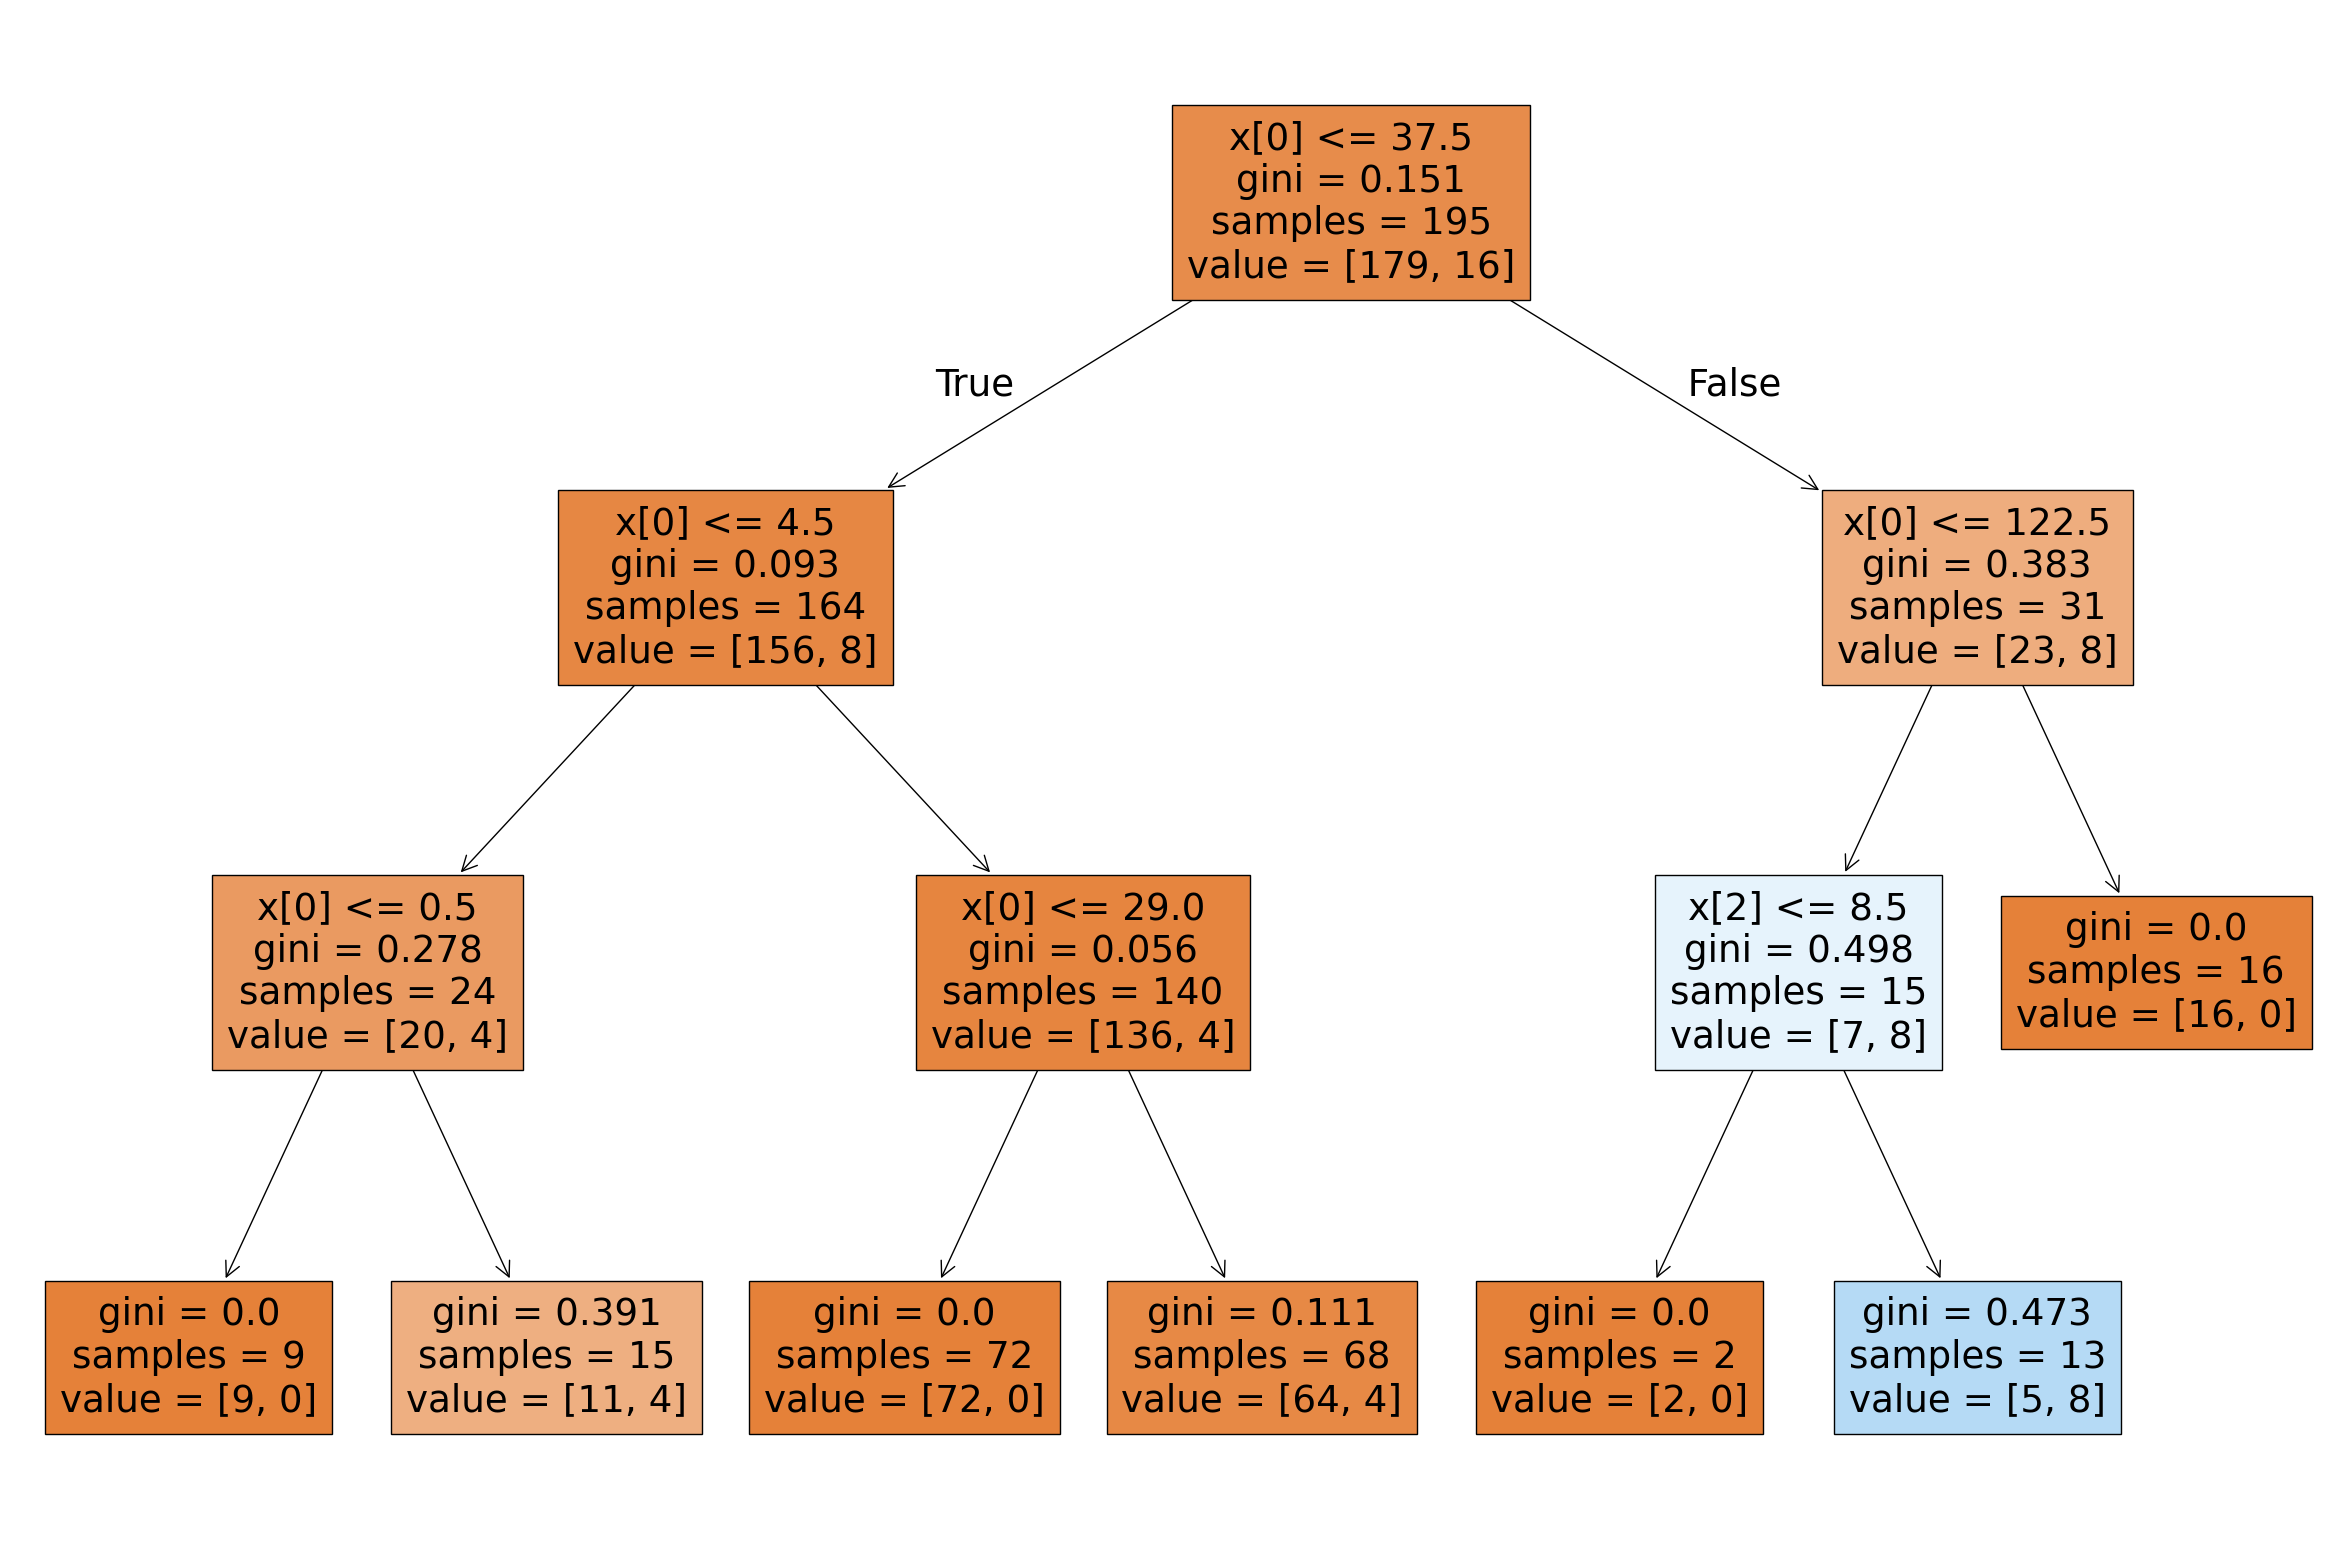

In [ ]:
plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()